In [1]:
# importing packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import keras
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
df = pd.read_csv("C:/Users/Sangamithra/Desktop/Data Sets/creditcardfraud.csv")

In [3]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
119708,75554.0,-1.149953,-0.785466,2.580240,-1.583430,-0.893688,0.146797,-0.440620,0.427750,-0.922276,...,0.528893,1.163812,-0.044845,0.225185,0.363771,-0.130592,0.024215,0.067313,109.00,0
36478,38555.0,1.060237,-0.681257,0.965044,0.529629,-1.108776,0.308704,-0.769782,0.173771,-0.839746,...,-0.098972,0.233179,-0.081100,0.227253,0.393924,-0.232497,0.082601,0.036448,79.00,0
45249,42264.0,0.656079,-0.691909,0.138644,1.604118,-0.650480,0.145598,-0.106889,0.163168,0.684801,...,0.068549,-0.127976,-0.396184,-0.079620,0.571910,-0.296689,0.015168,0.079868,258.76,0
223315,143333.0,1.916246,-0.357213,0.475087,1.377314,-1.047767,-0.000210,-1.067456,0.182745,1.438645,...,0.249609,0.943674,0.201500,-0.105746,-0.314510,-0.578532,0.100290,-0.018731,0.01,0
134903,81023.0,-0.762966,1.159223,-0.519819,-1.214505,2.460260,3.228012,0.098611,0.953997,-0.120617,...,-0.380358,-1.051288,-0.021003,0.928000,0.099234,0.097400,0.455288,0.226107,7.18,0


Text(0.5, 1.0, 'No Fraud (0) vs. Fraud (1)')

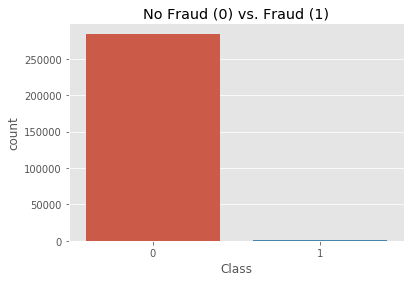

In [4]:
# taking a closer look at the class variable
sns.countplot('Class', data = df)
plt.title('No Fraud (0) vs. Fraud (1)')

In [ ]:
#One common way to tackle the issue of imbalanced data is over-sampling. Over-sampling refers to various methods that aim to increase the number of instances from the underrepresented class in the data set.
#In our case, these techniques will increase the number of fraudulent transactions in our data (usually to 50:50). You might ask why one would even do that in the first place. Good question. If you do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

In [ ]:
#Random naive over-sampling
#The easiest way to do so is to randomly select observations from the minority class and add them to the data set until we achieve a balance between the majority and minority class. Since this is relatively straight-forward one would not necessarily have to use imblearn but could randomly select observations using NumPy for instance.
#In imblearn, one would do the following after splitting our data into x (all variables except for the class) and y (the class):

In [7]:
X = df.iloc[:,0:30]  #independent columns
y = df.iloc[:,-1]    #target column class

In [8]:
#imports 
from imblearn.over_sampling import RandomOverSampler

# random oversampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# using Counter to display results of naive oversampling
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 284315), (1, 284315)]


In [9]:
#Issue Above :
#One issue with random naive over-sampling is that it just duplicates already existing data. Therefore, while classification algorithms are exposed to a greater amount of observations from the minority class, they won’t learn more about how to tell fraudulent and non-fraudulent observations apart. The new data does not contain more information about the characteristics of fraudulent transactions than the old data.

In [11]:
##Synthetic Minority Over-Sampling Technique (SMOTE)
##A more advanced alternative to using random naive over-sampling is Synthetic Minority Over-Sampling Technique(SMOTE). While SMOTE still oversamples the minority class, it does not rely on reusing previously existing observations. Instead, SMOTE creates new (synthetic) observations based on the observations in your data. How does SMOTE do that? To illustrate my point, I’ve put together a fictional data set:

In [13]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

# applying SMOTE to our data and checking the class counts
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 284315), (1, 284315)]


In [ ]:
#Adaptive Synthetic (ADASYN)
#ADASYN’s main advantage lies in its adaptive nature: by basing the number of synthetic observations on the ratio of majority to minority observations, ADASYN places a higher emphasis on more challenging regions of the data.

In [15]:
# importing ADASYN
from imblearn.over_sampling import ADASYN

# applying ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 284315), (1, 284298)]


In [16]:
#BorderlineSMOTE: Instead of oversampling between all minority observations, BorderlineSMOTE aims to increase the number of minority observations that border majority observations. The goal here is to allow the classifier to be able to distinguish between these borderline observations more clearly.

In [ ]:
# BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))